In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time
import random
import copy
import math


result for question 2 is 
-------------------------
The demand is  [  4.63239     20.1715       7.84986      2.20323      9.41249
  38.86684571 163.93907937   6.97208318  13.97773978  32.47670205]
The real distribution is  [127 255 253 127 255   1   1 127 255 519]
The best score is  2573903.9709579227
[8.998558081931188, 0.09515186105534193, 1.8808282505104295, 88.71955664622574, 1.0712348743187665, -924.7822838998138, -981.8119161167034, 2.490852234828388, 0.309200415918306, 0.024048782221933063]

result for question 3 is 
-------------------------
The demand is  [  4.63239     20.1715       7.84986      2.20323      9.41249
  38.86684571 163.93907937   6.97208318  13.97773978  32.47670205]
The real distribution is  [ 53.4 105.8  67.1  34.4  73.6   1.    1.   63.9 110.5 129.3]
640.0 640.0
The best score is  251808.91120701493
[7.559938425219402, 0.06675486255118604, 1.4389952517570568, 74.94915523055658, 0.7826891398202921, -924.7822838998138, -981.8119161167034, 2.0875405585018307, 0

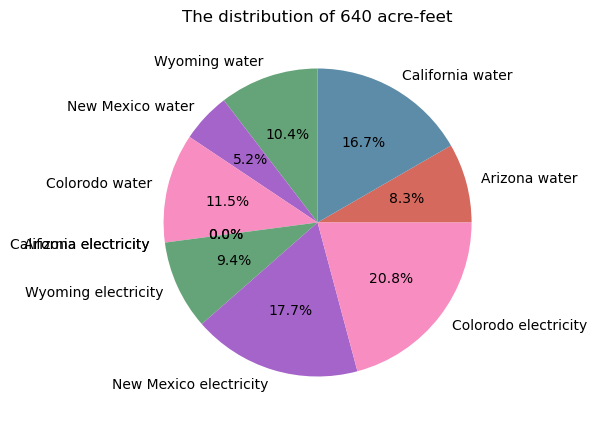

The demand is  [  4.63239     20.1715       7.84986      2.20323      9.41249
  38.86684571 163.93907937   6.97208318  13.97773978  32.47670205]
The real distribution is  [25.4         1.4        12.2        24.3         3.5         1.5
  1.2         5.2         1.1         1.44782609]
83.47826086956522 77.24782608695652
The best score is  3.0454513190488404e+19
[3.3215961793604136, -858.5264861600657, 0.8609740261316136, 58.05609308256059, -713.9373444695901, -924.7822838998138, -981.8119161167034, 0.4523214016903058, -800.3617628616457, -910.4412083275585]


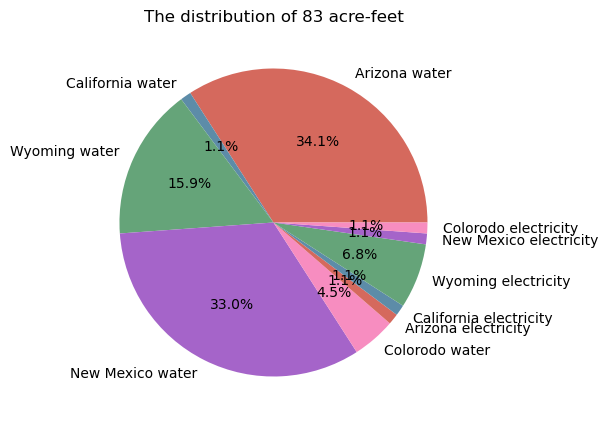

The demand is  [  4.63239     20.1715       7.84986      2.20323      9.41249
  38.86684571 163.93907937   6.97208318  13.97773978  32.47670205]
The real distribution is  [14.   2.   1.2 11.3  1.1  1.4  1.3  1.1  1.2  1.6]
44.651162790697676 36.2
The best score is  3.875800890515558e+22
[3.3215961793604136, -91.3834951623934, -664.4454809651379, 58.05609308256059, -713.9373444695901, -924.7822838998138, -981.8119161167034, -628.477688555006, -78.65453735810006, -103.29948534755832]


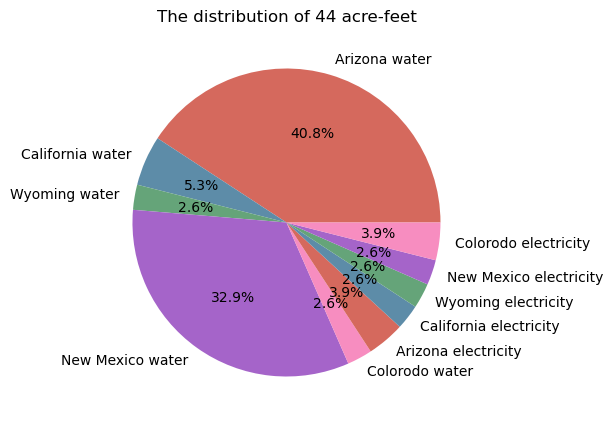

The demand is  [  4.63239     20.1715       7.84986      2.20323      9.41249
  38.86684571 163.93907937   6.97208318  13.97773978  32.47670205]
The real distribution is  [4.1       3.        1.6       2.9       1.7       1.7       1.8
 1.6       1.7       1.5952381]
30.476190476190474 21.695238095238093
The best score is  3.0969819252758574e+18
[-22.937462083620332, -8.051121072475675, -51.732170096573746, -162.87950671668887, -713.9373444695901, -106.67927812217292, -981.8119161167034, -45.33540395867093, -5.683366891642119, -103.29948534755832]


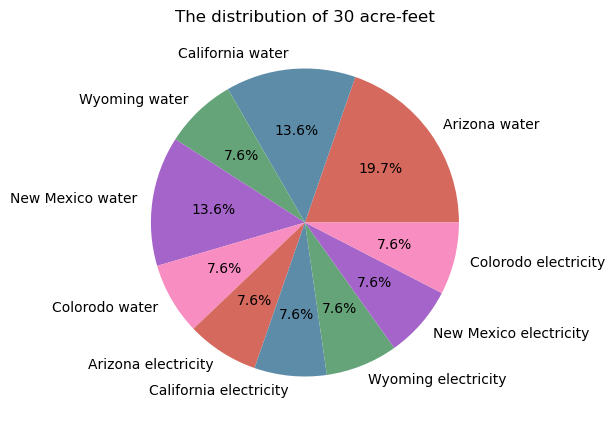

The demand is  [  4.63239     20.1715       7.84986      2.20323      9.41249
  38.86684571 163.93907937   6.97208318  13.97773978  32.47670205]
The real distribution is  [2.6        2.4        1.7        2.2        1.1        1.6
 1.4        1.2        1.7        0.87951807]
23.132530120481928 16.779518072289154
The best score is  3.762535387350058e+22
[-482.12768211130725, -8.051121072475675, -664.4454809651379, -162.87950671668887, -61.05043897375852, -924.7822838998138, -14.508961417580117, -45.33540395867093, -5.683366891642119, -424354.26291743136]


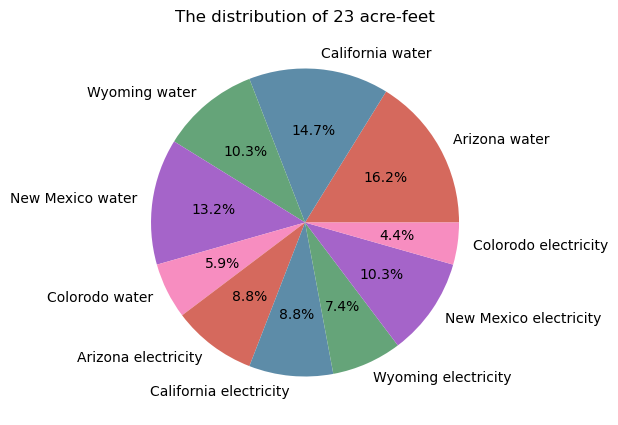

In [30]:
# 现在要对5个州做一个总的用水用电的水分配方案（分别给多少水，给多少电 -> 存多少水）
# a = 5个州的分别的总用水需求，b = 5个州分别的用电需求 -> 转化为5个州的存水需求 w
# 求最优的a、w，再计算得到最优的a、b
# 最优的评判：满足总和小于等于 M_v + P_v 的前提下，得分score()最高
# A = 5州分别实际总用水， B = 5州分别实际总用电
# fitting curve for all: y = 1.1370 lnx + -4.4675

m=10

M_v = 3000.976144195105 - -940.9125903639906
P_v = 2446.5858645842236 - 197.10793241368083
A = eval("""[4632.39
    20171.5
    7849.86
    2203.23
    9412.49]""".replace('\n', ','))
B = pd.read_csv('./elec_usage.csv')['Elec Consumption(in billion kwh)']
N = int((M_v + P_v)/3.22321112134556)
bitlength = N.bit_length()
N_GENERATIONS=10000



def e2w(y): return np.exp((y + 4.4675) / 1.1370)
def get_a_prime(A, B):
    ratio = B/sum(B)
    return np.append(A, e2w(np.sum(B)) * ratio)

def genetic_algorithm(a_prime, m, N):
    global bitlength, A, B, N_GENERATIONS
    def score(ai, a_primei, m):
        value = (m / a_primei - m / ai)**3
        # if abs(value) > 10:
        #     return m / a_primei
        # else:
        return value

    def evaluate(a, a_prime, m):
        summation = 1
        for i in range(len(a)):
            summation = summation * score(a[i], a_prime[i], m)
        return (summation)

    def init_random():
        x, tmp = [], []
        while len(tmp) < 9:
            r = random.randint(0, int(N))
            if r not in tmp and r != 0 and r != N:
                tmp.append(r)
        tmp.sort()
        x.append(tmp[0])
        for i in range(1, 9):
            x.append(tmp[i]-tmp[i-1])
        x.append(N-tmp[-1])
        return x

    def swap(x):
        new_x = copy.copy(x)
        x_copy = copy.copy(x)
        x = list(x)
        np.random.shuffle(x_copy)
        bitlength = int(N).bit_length()
        s = random.randint(0, bitlength-1)
        new_x[x.index(x_copy[0])] = int((bin(int(x_copy[0]))[2:]).zfill(bitlength)[:s] + bin(int(x_copy[1]))[2:].zfill(bitlength)[s:],2)
        new_x[x.index(x_copy[1])] = int(bin(int(x_copy[1]))[2:].zfill(bitlength)[:s] + bin(int(x_copy[0]))[2:].zfill(bitlength)[s:],2)
        return new_x

    def mutation(x):
        new_x = copy.copy(x)
        x_copy = copy.copy(x)
        ridx = random.randint(0, len(x_copy)-1)
        r = random.randint(0, bitlength-1)
        x_copy_bin = (bin(int(x_copy[ridx]))[2:]).zfill(bitlength)
        x_copy_bin = x_copy_bin[:r] + str((int(x_copy_bin[r])+1) % 2) + x_copy_bin[r+1:]
        new_x[ridx] = int(x_copy_bin, 2)
        return new_x

    def legal(x):
        if 0 in x:
            return False
        s = sum(x)
        if s > N:
            return False
        else:
            return True

    ## main part
    best_score = -999999
    next_x = init_random()
    best = next_x
    for _ in range(N_GENERATIONS):
        x = next_x
        y = swap(x)
        if not legal(y):
            y = x
        y_score = evaluate(y, a_prime, m)
        if y_score > best_score:
            best_score = y_score
            best = y
        z = mutation(y)
        if not legal(z):
            z = y
        z_score = evaluate(z, a_prime, m)
        if z_score > best_score:
            best_score = z_score
            best = z
        next_x = best
    best = np.array(best)
    return best, best_score, [score(best[i], a_prime[i], m) for i in range(len(best))]
def main():
    # import 2019 data
    global N, bitlength, A, B, N_GENERATIONS
    A, B = np.array(A), np.array(B)
    A = A / 1e3
    B = B / 365
    a_prime = get_a_prime(A, B)
    best, best_score, score_list = genetic_algorithm(a_prime, m, N)

    ### print result
    print("result for question 2 is ")
    print("-------------------------")
    print("The demand is ", a_prime)
    print("The real distribution is ", best)
    print("The best score is " ,best_score )
    print([score_list[i] for i in range(len(best))])

    ### then simulate question C:
    print()
    print("result for question 3 is ")
    print("-------------------------")
    plt.ion()
    N_copy = N
    dividers = np.arange(3, 100, 1) ### 2.01 at question 2
    for idx, divider in enumerate(dividers):
        if (idx % 20 == 0):
            N_copy = N / divider
            best = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
            for iter in range(10):
                best_, best_score, score_list = genetic_algorithm(a_prime, m, N_copy)
                best = best + best_
            best = best / 10
            percentage = best / N_copy * 100
            percentage = [int(i) for i in percentage]
            print("The demand is ", a_prime)
            print("The real distribution is ", best)
            print(N_copy, sum(best))
            print("The best score is " ,best_score )
            print([score_list[i] for i in range(len(best))])
            plt.figure(figsize=(5, 5))
            plt.pie(percentage, colors= ["#d5695d", "#5d8ca8", "#65a479", "#a564c9", "#f78dc0", "#d5695d", "#5d8ca8", "#65a479", "#a564c9", "#f78dc0"], labels = ['Arizona water', 'California water', 'Wyoming water', 'New Mexico water', 'Colorodo water', 'Arizona electricity', 'California electricity', 'Wyoming electricity', 'New Mexico electricity', 'Colorodo electricity'], autopct='%1.1f%%')
            plt.title("The distribution of " + str(int(N_copy)) + " acre-feet")
            plt.show()
    plt.ioff()
main()

In [31]:
# def score(ai, a_primei, m):
#     value = (m / a_primei - m / ai)**3
#     return value


# for i in range(len(a)):
#     score(a[i], a_prime[i], m)
